The Average Word Length by First Character Example
--------------------------------------------------

Write that reads a text input and computes the average lengths of all words that start with each character and displays the results in alphabetical order.

Example: 

    Text: "ACEMS is awesome"
    
Results:
    
    a = 6
    i = 2

For this input file the correct output should be: 

    _ = 5.0
    a = 3.98387616898
    b = 4.03378640777
    c = 7.17567567568
    d = 6.14582023884
    e = 6.82145782146
    f = 5.48642826368
    ....

_Hints:_ 

* use `[Ctrl+Enter]` to execute code in a cell.
* `addTuple` can be used to add two tuples of integers. 
* `mapValues` can by used to map values for each key. For example if the value is a tuple that has the sum of all numbers in a set as its first element and the number of items in the set as its second element this expression can be used to calculate the average of the numbers in the set:
        
        mapValues(lambda (total,count): float(total)/float(count))

In [6]:
import re

def addTuple(t1, t2):
    return (t1[0] + t2[0], t1[1] + t2[1])

avergeLengthRDD = sc.textFile('spark-data/prince_by_machiavelli.txt') \
    .flatMap(lambda s: re.split('[^A-Za-z_]+', s)) \
    .filter(lambda w:len(w) > 0) \
    .map(lambda w:w.lower()) \
    .map( lambda w: (w[0], (len(w), 1))) \
    .reduceByKey(addTuple) \
    .mapValues(lambda (total,count): float(total)/float(count)) \
    .sortByKey(True)

In [7]:
for letter, avg in avergeLengthRDD.collect():
    print "%s = %s" % (letter, avg)

_ = 5.0
a = 3.98387616898
b = 4.03378640777
c = 7.17567567568
d = 6.14582023884
e = 6.82145782146
f = 5.48642826368
g = 6.17741935484
h = 3.54229372081
i = 3.10601265823
j = 5.86842105263
k = 4.9674556213
l = 5.34412955466
m = 5.13793103448
n = 4.4922623434
o = 3.28647686833
p = 6.8757240653
q = 7.24
r = 6.69153394803
s = 5.43253662298
t = 3.53619933697
u = 5.55172413793
v = 6.34277620397
w = 4.29334451902
x = 3.20689655172
y = 3.59302325581
z = 6.16666666667


As a bonus we can use `matplotlib` to visualise the results.

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


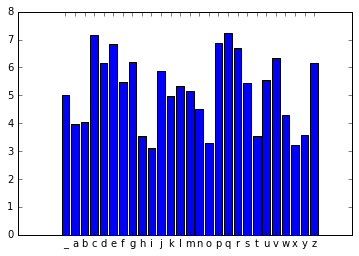

In [9]:
import matplotlib.pyplot as plt
keys, values = zip(*avergeLengthRDD.collect())
plt.bar(range(len(keys)), values, align='center')
plt.xticks(range(len(keys)), keys)
plt.show()